In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("data/train.csv")
df.sample(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
218,218,no,adult,530612,38.2,60.0,8.0,cool,normal,normal_pink,...,39.0,6.5,clear,1.6,no,2112,0,0,yes,lived
1010,1010,no,adult,528702,38.5,52.0,16.0,normal,normal,bright_pink,...,49.0,7.2,cloudy,1.6,no,0,0,0,yes,lived
703,703,yes,adult,5287179,37.2,68.0,16.0,cool,normal,pale_pink,...,48.0,8.6,serosanguious,6.3,yes,4205,0,0,yes,lived
1090,1090,yes,adult,530242,37.3,96.0,30.0,cool,reduced,pale_pink,...,57.0,4.5,serosanguious,4.1,yes,2205,0,0,yes,died
220,220,yes,adult,528247,37.5,40.0,36.0,normal,reduced,bright_red,...,44.0,5.9,clear,2.0,yes,2112,0,0,yes,lived


In [3]:
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [4]:
df['outcome'].value_counts()

outcome
lived         574
died          410
euthanized    251
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [32]:
df.isna().sum() > 0


id                       False
surgery                  False
age                      False
hospital_number          False
rectal_temp              False
pulse                    False
respiratory_rate         False
temp_of_extremities       True
peripheral_pulse          True
mucous_membrane           True
capillary_refill_time     True
pain                      True
peristalsis               True
abdominal_distention      True
nasogastric_tube          True
nasogastric_reflux        True
nasogastric_reflux_ph    False
rectal_exam_feces         True
abdomen                   True
packed_cell_volume       False
total_protein            False
abdomo_appearance         True
abdomo_protein           False
surgical_lesion          False
lesion_1                 False
lesion_2                 False
lesion_3                 False
cp_data                  False
outcome                  False
dtype: bool

In [43]:
columns_with_missing_values = df.columns[df.isna().sum() > 0]
for col in columns_with_missing_values:
    print(df[col].value_counts())
    print("Null values",df[col].isna().sum())
    print("*************\n")

temp_of_extremities
cool      700
normal    324
cold      121
warm       51
Name: count, dtype: int64
Null values 39
*************

peripheral_pulse
reduced      724
normal       429
absent        18
increased      4
Name: count, dtype: int64
Null values 60
*************

mucous_membrane
pale_pink        284
normal_pink      260
pale_cyanotic    250
bright_red       211
dark_cyanotic    121
bright_pink       88
Name: count, dtype: int64
Null values 21
*************

capillary_refill_time
less_3_sec    834
more_3_sec    393
3               2
Name: count, dtype: int64
Null values 6
*************

pain
depressed       429
mild_pain       408
severe_pain     146
extreme_pain    120
alert            87
slight            1
Name: count, dtype: int64
Null values 44
*************

peristalsis
hypomotile       664
absent           444
normal            53
hypermotile       53
distend_small      1
Name: count, dtype: int64
Null values 20
*************

abdominal_distention
moderate    543
slight 

<Axes: xlabel='abdomen', ylabel='count'>

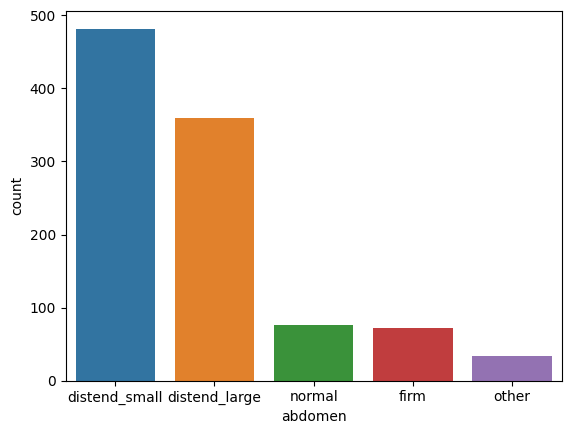

In [98]:
sns.barplot(x= a.index,y=df['abdomen'].value_counts(dropna=False))


In [96]:
a=df['abdomen'].value_counts(dropna=False)
a.index

Index(['distend_small', 'distend_large', nan, 'normal', 'firm', 'other'], dtype='object', name='abdomen')